<h1 style="text-align: center;">Analayse</h1>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
val_immo= pd.read_csv('../dev/data/RAW/valeursfoncieres-2020.txt', sep="|", dtype=str)

In [3]:
print(val_immo.shape)
val_immo.head()

(2459560, 43)


,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,07/01/2020,Vente,"8000,00",NaN,NaN,NaN,B063,FORTUNAT,1250,CEYZERIAT,01,72,NaN,AK,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290,LAIZ,01,203,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B006,BOIS DU CHAMP RION,1290,LAIZ,01,203,NaN,B,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B025,EN COROBERT,1290,LAIZ,01,203,NaN,B,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290,LAIZ,01,203,NaN,C,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148


The DataFrame has 14880473 rows in total

###### Cleaning

In [4]:
start = time.time()

val_immo.drop(['Code service CH', 'Reference document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI','5 Articles CGI', 'Identifiant local'], axis=1, inplace=True)
val_immo.drop(['No disposition', 'B/T/Q', 'Prefixe de section', 'Section', 'No plan', 'No Volume','1er lot','2eme lot','3eme lot','4eme lot','5eme lot','Date mutation', 'No voie', 'Type de voie' ,'Code voie', 'Nombre de lots', 'Code commune'], axis=1, inplace=True)
val_immo=val_immo[val_immo['Nature mutation']=='Vente']
val_immo.drop(['Nature mutation'], axis=1, inplace=True)
val_immo.dropna(subset=["Code type local"], axis=0, inplace=True)
val_immo.loc[:,'Nombre pieces principales']=val_immo.loc[:,'Nombre pieces principales'].astype(float)
val_immo.loc[:,'Valeur fonciere']=val_immo.loc[:,'Valeur fonciere'].replace(",",".", regex=True)
val_immo.loc[:,'Valeur fonciere']=val_immo.loc[:,'Valeur fonciere'].astype(float)
val_immo.loc[:,'Surface terrain']=val_immo.loc[:,'Surface terrain'].replace(",",".", regex=True)
val_immo.loc[:,'Surface terrain']=val_immo.loc[:,'Surface terrain'].astype(float)


val_immo.reset_index(drop=True, inplace=True)


end = time.time()
temps=end - start
total=14900000
print('Temps de traitement :',temps, 'secondes pour ', val_immo.shape[0], 'lignes')
print('Temps nécessaire pour traiter', total, 'lignes :', (temps*total)/(val_immo.shape[0]*60*60) ,'heures')

print(val_immo.shape)
val_immo.head(2)

Temps de traitement : 4.361006021499634 secondes pour  1300457 lignes
Temps nécessaire pour traiter 14900000 lignes : 0.013879520327671252 heures
(1300457, 17)


,Valeur fonciere,Voie,Code postal,Commune,Code departement,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,72000.0,LORETTE,1270,COLIGNY,01,NaN,NaN,NaN,NaN,NaN,1,Maison,35,2.0,S,NaN,381.0
1,180300.0,COMTE DE LA TEYSSONNIERE,1000,BOURG-EN-BRESSE,01,NaN,NaN,NaN,NaN,NaN,1,Maison,75,4.0,S,NaN,525.0


######  Surface par transactions

In [5]:
start = time.time()

surface_carrez=np.char.replace(val_immo["Surface Carrez du 1er lot"].to_numpy().astype(np.str),",",".").astype(float)
+np.char.replace(val_immo["Surface Carrez du 2eme lot"].to_numpy().astype(np.str),",",".").astype(float)
+np.char.replace(val_immo["Surface Carrez du 3eme lot"].to_numpy().astype(np.str),",",".").astype(float)
+np.char.replace(val_immo["Surface Carrez du 4eme lot"].to_numpy().astype(np.str),",",".").astype(float)
+np.char.replace(val_immo["Surface Carrez du 5eme lot"].to_numpy().astype(np.str),",",".").astype(float)


surface_bati= np.char.replace(val_immo["Surface reelle bati"].to_numpy().astype(np.str),",",".").astype(float)
for i in range(0,surface_carrez.shape[0]) :
    if surface_carrez[i]==0 or np.isnan(surface_carrez[i]):
        surface_carrez[i]=surface_bati[i]
val_immo["Surface Carrez"]=surface_carrez


val_immo.drop([ 'Surface Carrez du 1er lot','Surface Carrez du 2eme lot','Surface Carrez du 3eme lot','Surface Carrez du 4eme lot','Surface Carrez du 5eme lot'], axis=1, inplace=True)
val_immo.drop([ 'Surface reelle bati'], axis=1, inplace=True)

end = time.time()
temps=end - start
total=14900000
print('Temps de traitement :',temps, 'secondes pour ', val_immo.shape[0], 'lignes')
print('Temps nécessaire pour traiter', total, 'lignes :', (temps*total)/(val_immo.shape[0]*60*60) ,'heures')

print(val_immo.shape)
val_immo.head(3)

<ipython-input-5-a91408051c1c>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  surface_carrez=np.char.replace(val_immo["Surface Carrez du 1er lot"].to_numpy().astype(np.str),",",".").astype(float)
<ipython-input-5-a91408051c1c>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  +np.char.replace(val_immo["Surface Carrez du 2eme lot"].to_numpy().astype(np.str

Temps de traitement : 10.588396310806274 secondes pour  1300457 lignes
Temps nécessaire pour traiter 14900000 lignes : 0.03369907335801814 heures
(1300457, 12)


,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code type local,Type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Carrez
0,72000.0,LORETTE,1270,COLIGNY,01,1,Maison,2.0,S,NaN,381.0,35.00
1,180300.0,COMTE DE LA TEYSSONNIERE,1000,BOURG-EN-BRESSE,01,1,Maison,4.0,S,NaN,525.0,75.00
2,54800.0,DU CHAMP DE FOIRE,1000,BOURG-EN-BRESSE,01,2,Appartement,1.0,NaN,NaN,NaN,31.68


######  Supression dupliquer

In [6]:
fonciere=val_immo['Valeur fonciere'].to_numpy()
marker=np.full((fonciere.shape[0]), False)

counter = 0
start = time.time()
for i in range (0,fonciere.shape[0]-1) :
    if fonciere[i]==fonciere[i+1]:
        marker[1]=True
        marker[i+1]=True
        counter = counter + 1
end = time.time()
temps=end - start
total=14900000
print('Temps de traitement :',temps, 'secondes', 'pour', fonciere.shape[0], 'lignes')
print('Nombre de duplicatat trouvé :', counter)
print('Temps nécessaire pour traiter', total, 'lignes :', (temps*total)/(val_immo.shape[0]*60*60) ,'heures')

dropped=val_immo.shape[0]
val_immo.drop(np.where(marker==True)[0], axis=0, inplace=True)
dropped=dropped-val_immo.shape[0]
print(dropped, 'lines dropped')

val_immo.reset_index(drop=True, inplace=True)

print(val_immo.shape)
val_immo.head(3)

Temps de traitement : 0.3344917297363281 secondes pour 1300457 lignes
Nombre de duplicatat trouvé : 496080
Temps nécessaire pour traiter 14900000 lignes : 0.0010645673817980246 heures
496081 lines dropped
(804376, 12)


,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code type local,Type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Carrez
0,72000.0,LORETTE,1270,COLIGNY,01,1,Maison,2.0,S,NaN,381.0,35.00
1,54800.0,DU CHAMP DE FOIRE,1000,BOURG-EN-BRESSE,01,2,Appartement,1.0,NaN,NaN,NaN,31.68
2,350750.0,DES GDES CADALLES,1000,SAINT-DENIS-LES-BOURG,01,1,Maison,7.0,J,NaN,1267.0,201.00


In [7]:
print('\n','Pourcentage maison',val_immo[val_immo['Code type local']=='1'].shape[0]/val_immo.shape[0],
      '\n',
      'Pourcentage appartement',val_immo[val_immo['Code type local']=='2'].shape[0]/val_immo.shape[0])


 Pourcentage maison 0.503810407073309 
 Pourcentage appartement 0.2842128556794335


In [8]:
val_immo = val_immo[ val_immo['Code type local']=='1' ]
val_immo.reset_index(drop=True, inplace=True)

print(val_immo.shape)
val_immo.head(3)

(405253, 12)


,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code type local,Type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Carrez
0,72000.0,LORETTE,1270,COLIGNY,01,1,Maison,2.0,S,NaN,381.0,35.0
1,350750.0,DES GDES CADALLES,1000,SAINT-DENIS-LES-BOURG,01,1,Maison,7.0,J,NaN,1267.0,201.0
2,215000.0,DU COLOMBIER,1250,TOSSIAT,01,1,Maison,4.0,S,NaN,790.0,93.0


In [9]:
# Let's add a price per meter square column and get a quick description of the DataFrame
print(val_immo.shape)
val_immo["Prix_m2"]=val_immo['Valeur fonciere']/val_immo['Surface Carrez']
val_immo.describe(include='all')

(405253, 12)


,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code type local,Type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Carrez,Prix_m2
count,4.035940e+05,405211,405241,405253,405253,405253,405253,405252.000000,387679,7544,387679.000000,405252.000000,4.035930e+05
unique,NaN,142897,5731,26952,97,1,1,NaN,26,72,NaN,NaN,NaN
top,NaN,GRANDE RUE,59200,BORDEAUX,59,1,Maison,NaN,S,POTAG,NaN,NaN,NaN
freq,NaN,2622,979,1276,23425,405253,405253,NaN,346084,3531,NaN,NaN,NaN
mean,2.308693e+05,NaN,NaN,NaN,NaN,NaN,NaN,4.247503,NaN,NaN,700.684667,102.150054,2.345358e+03
std,7.522709e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.489601,NaN,NaN,2438.350630,45.212477,6.785798e+03
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.857143e-03
25%,1.140000e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,256.000000,75.000000,1.244094e+03
50%,1.800000e+05,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,499.000000,94.000000,1.883117e+03
75%,2.800000e+05,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,777.000000,120.000000,2.826250e+03


Let's have a quick idea of how big are most of the house :

In [10]:
val_immo=val_immo[ (val_immo['Surface Carrez']<=200) &
                  (val_immo['Surface terrain']<=1000) &
                 (val_immo['Nombre pieces principales']<=10)]

val_immo.reset_index(drop=True, inplace=True)

val_immo.shape

(326316, 13)

In [11]:
val_immo.to_csv('../dev/data/RAW/val_immo.csv', index=False)
val_immo=pd.read_csv('../dev/data/RAW/val_immo.csv')

C:\Users\33658\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Surface Carrez', ylabel='Density'>

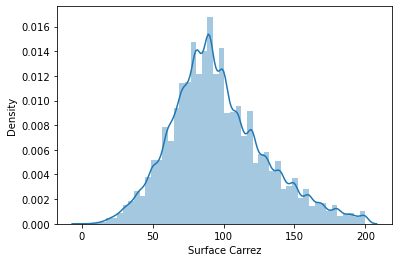

In [12]:
sns.distplot(val_immo['Surface Carrez'] )

<AxesSubplot:xlabel='Surface terrain', ylabel='Valeur fonciere'>

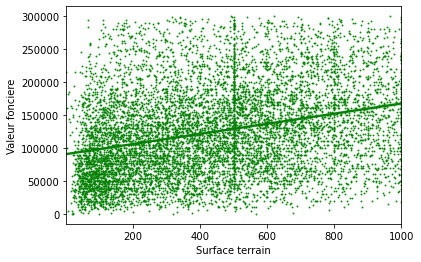

In [13]:
sns.regplot(x='Surface terrain', 
            y='Valeur fonciere', 
            data=val_immo.head(10000)[val_immo.head(10000)['Valeur fonciere']<300000], 
            color='green', 
            scatter_kws={'s': 1})

## Vente de maison par commune

In [14]:
com_immo=val_immo.groupby('Commune').mean()
com_immo['N']=val_immo.groupby('Commune').size()
com_immo.reset_index(inplace=True)
com_immo.head()

,Commune,Valeur fonciere,Code postal,Code type local,Nombre pieces principales,Surface terrain,Surface Carrez,Prix_m2,N
0,AAST,192600.000000,64460.0,1,4.000000,631.000000,156.000000,1234.615385,1
1,ABANCOURT,111760.000000,59744.0,1,3.857143,503.857143,80.928571,1341.163607,14
2,ABAUCOURT,153900.000000,54610.0,1,4.666667,311.666667,118.000000,1306.379797,3
3,ABAUCOURT-HAUTECOURT,70000.000000,55400.0,1,4.000000,720.000000,113.000000,619.469027,1
4,ABBARETZ,130394.833333,44170.0,1,3.583333,350.541667,89.625000,1527.490204,24
